In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.16.1


In [ ]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

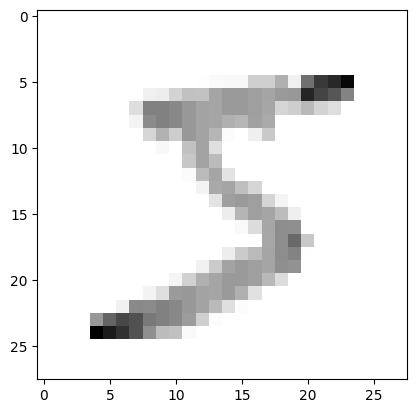

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(y_train[0])

5


In [ ]:

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

import tensorflow as tf

# Initialize a basic feed-forward model
model = tf.keras.models.Sequential()

# Flatten the input from 28x28 to a single vector of 784 elements
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Add the first fully-connected layer with 128 units and ReLU activation
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Add a second fully-connected layer with 128 units and ReLU activation
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Add the output layer with 10 units and softmax activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Ensure 'softmax' is used instead of 'softmax_v2'
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3


C:\Users\SSD\anaconda3\envs\genai\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8631 - loss: 0.4788
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9649 - loss: 0.1149
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0740
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.9690 - loss: 0.1023
0.08976459503173828
0.9728000164031982


In [ ]:
model.save('annintro.keras')

In [ ]:

from keras.models import load_model
new_model =load_model('annintro.keras')

In [ ]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,848 (1.35 MB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,566 (924.09 KB)

In [ ]:
predictions = new_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step


In [ ]:
print(predictions)

[[6.0316946e-10 2.5122819e-08 1.3985039e-06 ... 9.9999392e-01
  2.9758674e-08 9.7273301e-09]
 [8.1875828e-10 2.5192386e-04 9.9974531e-01 ... 7.3438117e-10
  1.5593988e-08 1.7824490e-12]
 [1.9095587e-08 9.9965370e-01 4.9175355e-06 ... 1.2624568e-04
  2.0340041e-04 1.8514125e-07]
 ...
 [4.4163187e-08 8.7156792e-08 1.7962039e-07 ... 3.8680329e-05
  3.9676917e-05 1.0690895e-04]
 [1.5404105e-06 7.8714123e-08 5.4997965e-08 ... 3.6324266e-08
  1.5376705e-02 3.2677561e-09]
 [8.1497283e-06 6.8111966e-08 1.6686304e-06 ... 1.1049033e-09
  5.5359720e-07 7.9041875e-08]]


In [ ]:
import numpy as np

print(np.argmax(predictions[0]))

7


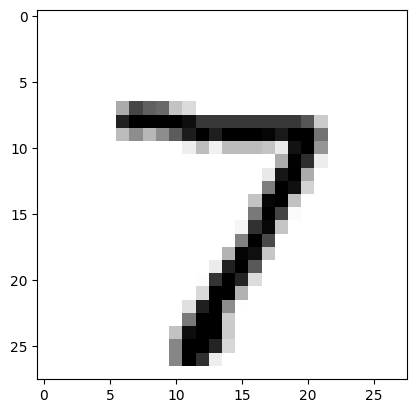

In [ ]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

### check overfitting

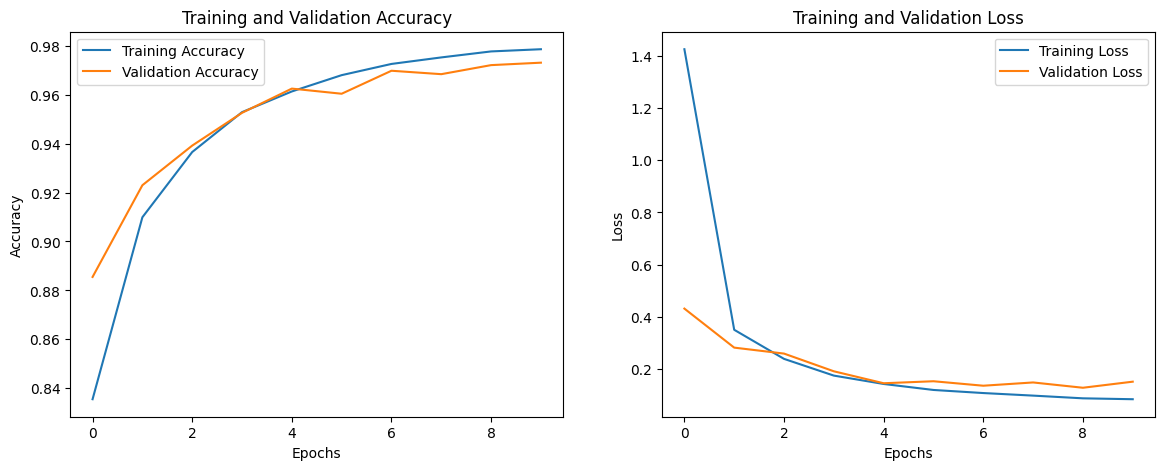

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy and loss
def plot_loss_accuracy(history):
    # Accuracy plot
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot
plot_loss_accuracy(history)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8961 - loss: 0.3483 - val_accuracy: 0.9665 - val_loss: 0.1054
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9734 - loss: 0.0857 - val_accuracy: 0.9731 - val_loss: 0.0841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9832 - loss: 0.0512 - val_accuracy: 0.9764 - val_loss: 0.0777
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9893 - loss: 0.0341 - val_accuracy: 0.9742 - val_loss: 0.0946
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9752 - val_loss: 0.0916
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9927 - loss: 0.0221 - val_accuracy: 0.9730 - val_loss: 0.1211
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9743 - val_loss: 0.1059
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9948 - loss: 0.

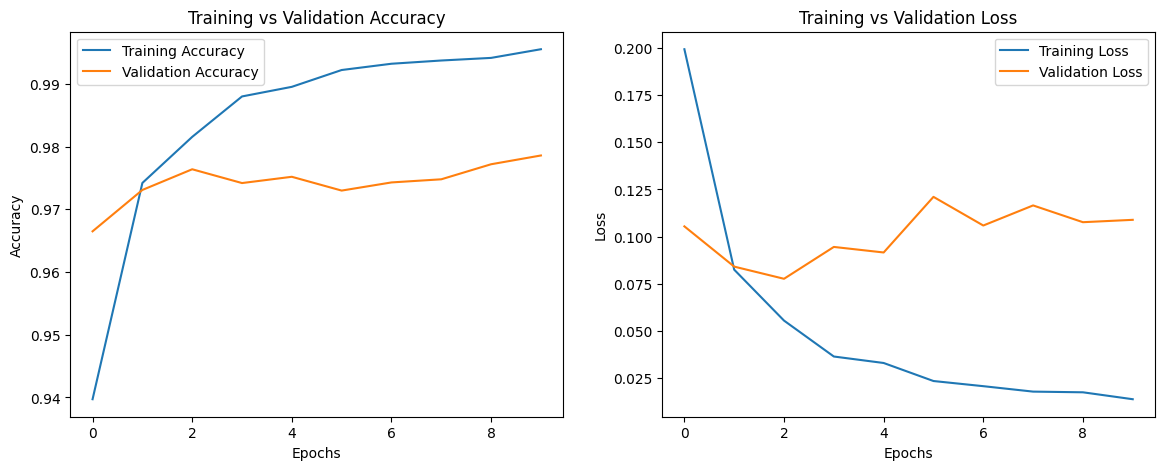

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


model_overfit = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model_overfit.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


history_overfit = model_overfit.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

def plot_overfit(history):
    # Plot accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_overfit(history_overfit)


### Overcoming Overfitting

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8470 - loss: 0.5006 - val_accuracy: 0.9620 - val_loss: 0.1270
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9487 - loss: 0.1707 - val_accuracy: 0.9701 - val_loss: 0.0960
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9597 - loss: 0.1297 - val_accuracy: 0.9703 - val_loss: 0.0946
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9657 - loss: 0.1130 - val_accuracy: 0.9739 - val_loss: 0.0883
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9680 - loss: 0.1028 - val_accuracy: 0.9770 - val_loss: 0.0833
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9735 - loss: 0.0874 - val_accuracy: 0.9783 - val_loss: 0.0765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9736 - loss: 0.0838 - val_accuracy: 0.9780 - val_loss: 0.0785
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9742 - loss: 0.0838 

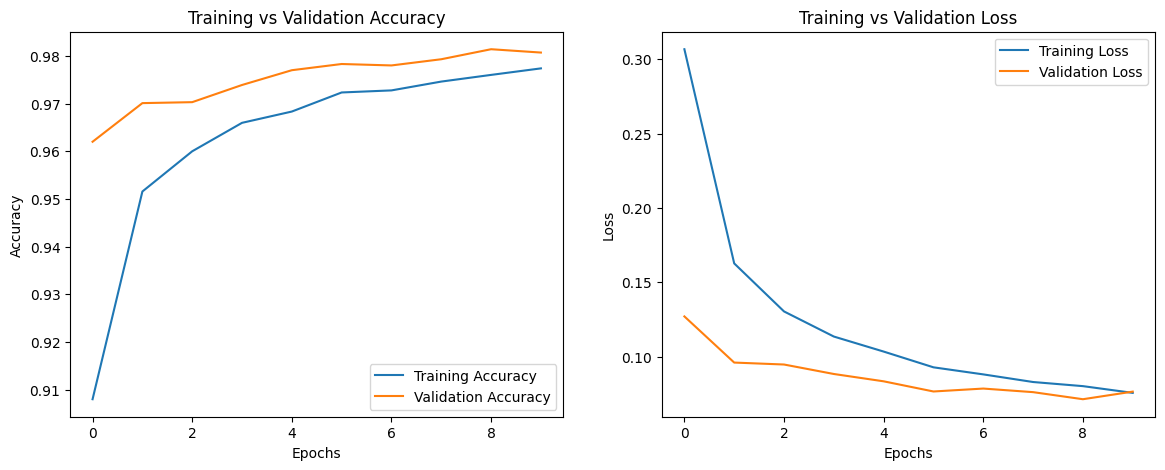

In [ ]:
# Create a model with dropout layers
model_with_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout with 50% rate
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout with 50% rate
    tf.keras.layers.Dense(10, activation='softmax')
])


model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])


history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


plot_overfit(history_with_dropout)# Plot the results for comparison


### hyper parameter tuning

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt


def build_model(hp):
    model = keras.Sequential()


    model.add(keras.layers.Flatten(input_shape=(28, 28)))


    hp_units_1 = hp.Int('units_1', min_value=64, max_value=256, step=32)
    model.add(keras.layers.Dense(units=hp_units_1, activation='relu'))


    hp_units_2 = hp.Int('units_2', min_value=64, max_value=256, step=32)
    model.add(keras.layers.Dense(units=hp_units_2, activation='relu'))


    model.add(keras.layers.Dense(10, activation='softmax'))


    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimization objective
    max_trials=5,  # Number of models to try
    executions_per_trial=3,  # Number of times to train each model
    directory='tuner_dir',
    project_name='mnist_tuning'
)

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the tuned model
val_loss, val_acc = best_model.evaluate(x_test, y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


Trial 5 Complete [00h 00m 57s]
val_accuracy: 0.95196666320165

Best val_accuracy So Far: 0.9635999997456869
Total elapsed time: 00h 04m 36s
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7880 - loss: 4.2207 - val_accuracy: 0.8855 - val_loss: 0.4307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9043 - loss: 0.3708 - val_accuracy: 0.9230 - val_loss: 0.2810
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9319 - loss: 0.2449 - val_accuracy: 0.9392 - val_loss: 0.2581
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9501 - loss: 0.1779 - val_accuracy: 0.9526 - val_loss: 0.1901
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9623 - loss: 0.1336 - val_accuracy: 0.9625 - val_loss: 0.1442
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9684 - loss: 0.1163 - val_accuracy: 0.9604 - val_loss: 0.1519
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9725 - loss: